In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
data_user = pd.read_csv('./tianchi_mobile_recommend_train_user.csv')

In [8]:
# 缺失值处理
missingTotal = data_user.isnull().sum()
missingExist = missingTotal[missingTotal>0]
missingExist = missingExist.sort_values(ascending=False)
missingExist

user_geohash    8334824
dtype: int64

In [9]:
data_user.head(10)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21
5,93784494,337869048,1,NaN,3979,2014-12-03 20
6,94832743,105749725,1,NaN,9559,2014-12-13 20
7,95290487,76866650,1,NaN,10875,2014-11-27 16
8,96610296,161166643,1,NaN,3064,2014-12-11 23
9,100684618,21751142,3,NaN,2158,2014-12-05 23


In [10]:
# 一致化处理
import re
# 拆分数据集
data_user['date'] = data_user['time'].map(lambda s : re.compile(' ').split(s)[0])
data_user['hour'] = data_user['time'].map(lambda s : re.compile(' ').split(s)[1])
data_user.head(10)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21
5,93784494,337869048,1,NaN,3979,2014-12-03 20,2014-12-03,20
6,94832743,105749725,1,NaN,9559,2014-12-13 20,2014-12-13,20
7,95290487,76866650,1,NaN,10875,2014-11-27 16,2014-11-27,16
8,96610296,161166643,1,NaN,3064,2014-12-11 23,2014-12-11,23
9,100684618,21751142,3,NaN,2158,2014-12-05 23,2014-12-05,23


In [12]:
# 查看data_user数据集数据类型
data_user.dtypes

user_id           int64
item_id           int64
behavior_type     int64
user_geohash     object
item_category     int64
time             object
date             object
hour             object
dtype: object

In [13]:
# 将time和date转化为日期类型数据，hour为字符串数据类型
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time'] = pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype('int64')
data_user.dtypes

user_id                   int64
item_id                   int64
behavior_type             int64
user_geohash             object
item_category             int64
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [20]:
# 异常值处理
data_user = data_user.sort_values(by='time', ascending=True)
data_user = data_user.reset_index(drop=True) # 重置索引
data_user.describe()

,index,user_id,item_id,behavior_type,item_category,hour
count,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07,1.225691e+07
mean,6.128452e+06,7.170732e+07,2.023084e+08,1.105271e+00,6.846162e+03,1.481799e+01
std,3.538264e+06,4.122920e+07,1.167397e+08,4.572662e-01,3.809922e+03,6.474778e+00
min,0.000000e+00,4.913000e+03,6.400000e+01,1.000000e+00,2.000000e+00,0.000000e+00
25%,3.064226e+06,3.584965e+07,1.014130e+08,1.000000e+00,3.721000e+03,1.000000e+01
50%,6.128452e+06,7.292804e+07,2.021359e+08,1.000000e+00,6.209000e+03,1.600000e+01
75%,9.192679e+06,1.073774e+08,3.035405e+08,1.000000e+00,1.029000e+04,2.000000e+01
max,1.225690e+07,1.424559e+08,4.045625e+08,4.000000e+00,1.408000e+04,2.300000e+01


### 用户行为分析
 1. pv和uv分析
    PV(访问量)：即Page View, 具体是指网站的是页面浏览量或者点击量，页面被刷新一次就计算一次。
    
    UV(独立访客)：即Unique Visitor,访问您网站的一台电脑客户端为一个访客。

Text(0.5, 1.0, 'pv_daily')

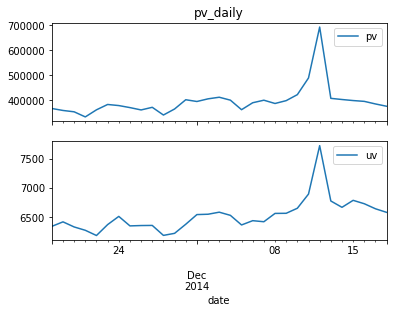

In [24]:
# 1. 日访问量分析
# pv_daily记录每天用户操作次数，uv_daily记录每天不同的上线用户数量
pv_daily = data_user.groupby('date')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x : x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig, axes = plt.subplots(2, 1, sharex=True)
pv_daily.plot(x='date', y='pv', ax=axes[0])
uv_daily.plot(x='date', y='uv', ax=axes[1])
axes[0].set_title('pv_daily')

Text(0.5, 1.0, 'uv_hour')

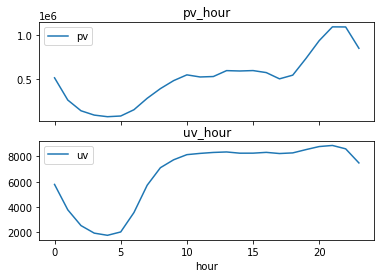

In [25]:
# 小时访问量分析
# pv_hour记录每小时用户操作次数，uv_hour记录每小时不同的上线用户数量
pv_hour = data_user.groupby('hour')['user_id'].count().reset_index().rename(columns={'user_id':'pv'})
uv_hour = data_user.groupby('hour')['user_id'].apply(lambda x : x.drop_duplicates().count()).reset_index().rename(columns={'user_id':'uv'})
fig, axes = plt.subplots(2, 1, sharex=True)
pv_hour.plot(x='hour', y='pv', ax=axes[0])
uv_hour.plot(x='hour', y='uv', ax=axes[1])
axes[0].set_title('pv_hour')
axes[1].set_title('uv_hour')

Text(0.5, 1.0, 'pv_different_behavior_type_except1')

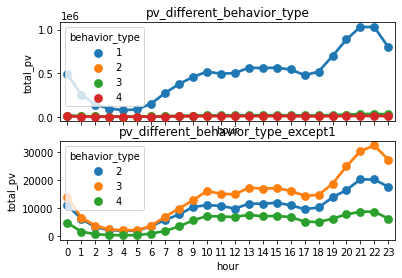

In [27]:
# 不同行为类型用户pv分析
pv_detail = data_user.groupby(['behavior_type', 'hour'])['user_id'].count().reset_index().rename(columns={'user_id':'total_pv'})
fig, axes = plt.subplots(2, 1, sharex=True)
sns.pointplot(x='hour', y='total_pv', hue='behavior_type', data=pv_detail, ax=axes[0])
sns.pointplot(x='hour', y='total_pv', hue='behavior_type', data=pv_detail[pv_detail.behavior_type!=1], ax=axes[1])
axes[0].set_title('pv_different_behavior_type')
axes[1].set_title('pv_different_behavior_type_except1')

### 用户消费行为分析

Text(0.5, 1.0, 'daily_user_buy')

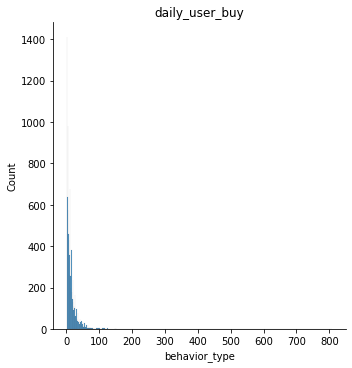

In [29]:
# 1.用户购买次数情况分析
data_user_buy = data_user[data_user.behavior_type==4].groupby('user_id')['behavior_type'].count()
sns.displot(data_user_buy, kde=False)
plt.title('daily_user_buy')

Text(0.5, 1.0, 'daily_ARPPU')

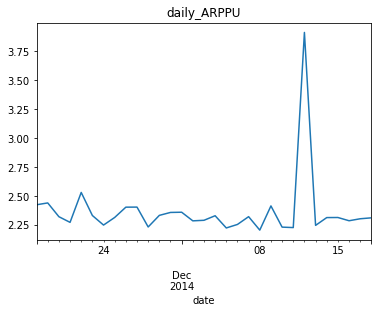

In [30]:
data_user_buy1 = data_user[data_user.behavior_type==4].groupby(['date', 'user_id'])['behavior_type'].count().reset_index().rename(columns={'behavior_type':'total'})
data_user_buy1.groupby('date').apply(lambda x:x.total.sum()/x.total.count()).plot()
plt.title('daily_ARPPU')

### 复购情况分析

In [32]:
#复购情况，即两天以上有购买行为,一天多次购买算一次
#复购率=有复购行为的用户数/有购买行为的用户总数
date_rebuy = data_user[data_user.behavior_type==4].groupby('user_id')['date'].apply(lambda x:len(x.unique())).rename('rebuy_count')
print('复购率', round(date_rebuy[date_rebuy>=2].count()/date_rebuy.count(), 4))

复购率 0.8717


AttributeError: 'DataFrameGroupBy' object has no attribute 'operation'

### 漏斗流失分析